# Hyperparameter optimization

$\large \hat{x} = \arg \min_{x \in X} f(x) $

## Imports

In [2]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import Ridge
from scipy.stats import uniform as sp_rand
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
from hyperopt import hp, tpe, fmin, Trials
import warnings
warnings.filterwarnings(action='ignore',category=FutureWarning)

## Load data and parameters

In [3]:
dataset = datasets.load_diabetes()

## Grid Search

In plain English, brute force  
  
Create and fit a ridge regression model, testing each alpha

In [4]:
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
model = Ridge()
gs = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
gs.fit(dataset.data, dataset.target)

print('Best alpha ; ', gs.best_estimator_.alpha)
print('Best score : ', gs.best_score_)

Best alpha ;  0.0001
Best score :  0.48232313841634833


## Randomized Search
  
Instead of exhaustive search, random search (better for high dimension datasets)

Create and fit a ridge regression model, testing random alpha values

In [5]:
param_grid = {'alpha': sp_rand()}

model = Ridge()
rs = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100)
rs.fit(dataset.data, dataset.target)

print('Best alpha ; ', rs.best_estimator_.alpha)
print('Best score : ', rs.best_score_)

Best alpha ;  0.009456193832764082
Best score :  0.48148057186484844


## Bayesian search

Change the direction of search depending on likelihood of previous steps  

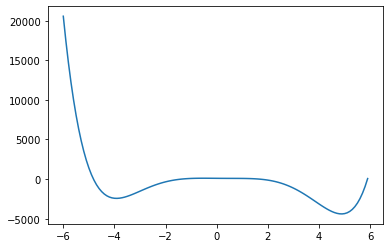

In [7]:
def f(x): 
    f = np.poly1d([1, -2, -28, 28, 12, -26, 100])
    return f(x)


x = np.arange(-6, 6, 0.1)
y = f(x)
plt.plot(x,y);

In [8]:
spc = hp.uniform('x', -6, 6)

In [9]:
tpe_algo = tpe.suggest
tpe_trials = Trials()
tpe_best = fmin(fn=f, space=spc, algo=tpe_algo, trials=tpe_trials, max_evals=2000)
tpe_best

100%|███████████████████████████████████████████| 2000/2000 [00:12<00:00, 163.43trial/s, best loss: -4396.024029708038]


{'x': 4.8782713055336515}

All in one line:  

In [11]:
best = fmin(fn = lambda x: np.poly1d([1, -2, -28, 28, 12, -26, 100])(x), space = hp.normal('x', 4.9, 0.5), algo=tpe.suggest, max_evals = 2000)

100%|███████████████████████████████████████████| 2000/2000 [00:11<00:00, 180.48trial/s, best loss: -4396.024080104846]


## Credits & Links

https://machinelearningmastery.com/how-to-tune-algorithm-parameters-with-scikit-learn/